# TASK-4: SALES PREDICTION 
Author:- Kunal Kumar

Batch:- July

Domain:-Data science

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#data inspection
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
#data cleaning
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
#basic observation
#avg expense spend is highest on TV
#avg expense spend is lowest on Radio
#max sale is 27 and min is 1.6

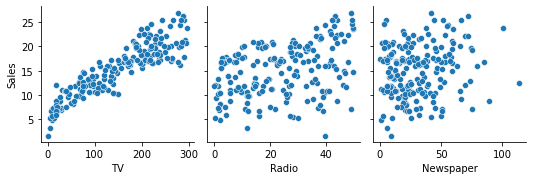

In [17]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars = 'Sales', kind = 'scatter')
plt.show()

pair plot observation
when advertising cost increases in TV ads the sales will increase as well. whlie the for newspaper and radio it is bit unpredictable

<AxesSubplot:ylabel='Frequency'>

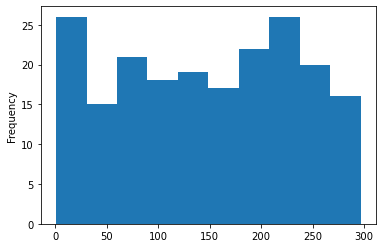

In [18]:
df['TV'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

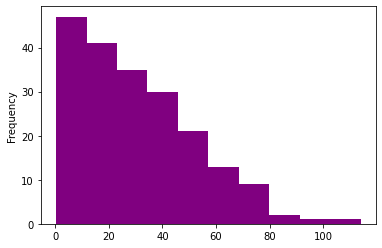

In [19]:
df['Newspaper'].plot.hist(bins=10, color="purple",xlabel="newspaper")

Histogram observation:

the majority sales is the result of low advertising cost in newspaper

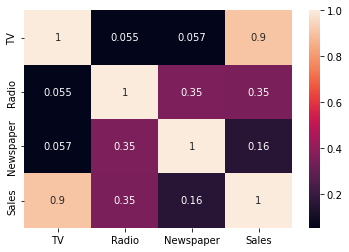

In [20]:
sns.heatmap(df.corr(),annot = True)
plt.show()

# SALES IS HIGHLY COORELATED WITH THE TV
lets train our model using linear regression as it is coorelated with only one variable TV

In [89]:
X = df['TV']
y = df['Sales']

In [90]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [63]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [64]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [65]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

Building a Linear Model

In [68]:
import statsmodels.api as sm

In [69]:
X_train_sm = sm.add_constant(X_train)

In [70]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [88]:
#print the parameters, i.e. intercept and the slope of the regression lilne fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [87]:
#performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.52e-52
Time:                        19:04:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

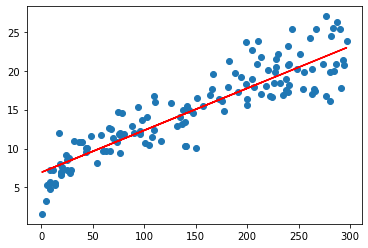

In [73]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [74]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


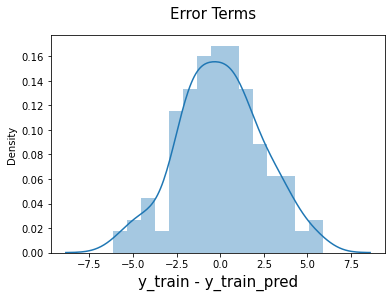

In [75]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Looking for patterns in the residuals

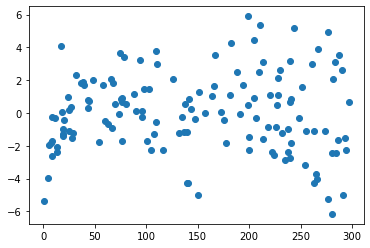

In [76]:
plt.scatter(X_train,res)
plt.show()

In [86]:
#add a constant to x_set
X_test_sm = sm.add_constant(X_test)

In [85]:
#predict the y values corresponding to x_test_sm
y_pred = lr.predict(X_test_sm)

In [79]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
#returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662337

Checking the R-squared on the test set

In [83]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245656

Visualizing the fit on the test set

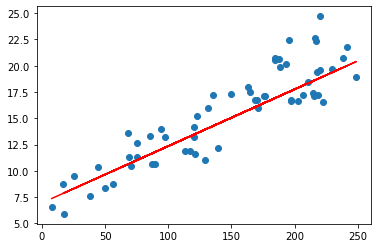

In [82]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()